 Multi-page web-scraping

In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

 Looping through multiple pages

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-6-2e47bb25bda7>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [7]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nReview after 1 year usage,Pros -In one line it is the most balanced smar...,24 November 2023
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nOP phone for gaming and lo...,Very good camera(do not trust youtubers)I'd re...,26 November 2023
3,5.0,5.0 out of 5 stars\nNice pic,Good product,12 December 2023
4,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21 September 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nGood,Same as expected,30 September 2023
96,5.0,5.0 out of 5 stars\nGood,Very good,1 December 2023
97,3.0,3.0 out of 5 stars\nCamera quality to good,Good product,12 December 2023
98,3.0,3.0 out of 5 stars\nAverage,Not good not bad,16 December 2023


In [8]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

 Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [10]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews


,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nReview after 1 year usage,Pros -In one line it is the most balanced smar...,24 November 2023
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nOP phone for gaming and lo...,Very good camera(do not trust youtubers)I'd re...,26 November 2023
3,5.0,5.0 out of 5 stars\nNice pic,Good product,12 December 2023
4,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21 September 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nGood,Same as expected,30 September 2023
96,5.0,5.0 out of 5 stars\nGood,Very good,1 December 2023
97,3.0,3.0 out of 5 stars\nCamera quality to good,Good product,12 December 2023
98,3.0,3.0 out of 5 stars\nAverage,Not good not bad,16 December 2023


 Data Exploration

In [11]:
reviews.Rating.describe()

count    100.000000
mean       4.170000
std        0.569512
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

Number of Words

In [12]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Pros -In one line it is the most balanced smar...,76
1,The media could not be loaded.\n ...,559
2,Very good camera(do not trust youtubers)I'd re...,14
3,Good product,2
4,"Ok , so this phone is good but not best in seg...",108


Number of characters

In [13]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Pros -In one line it is the most balanced smar...,390.0
1,The media could not be loaded.\n ...,2792.0
2,Very good camera(do not trust youtubers)I'd re...,91.0
3,Good product,12.0
4,"Ok , so this phone is good but not best in seg...",604.0


Average Word Length

In [15]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Pros -In one line it is the most balanced smar...,4.144737
1,The media could not be loaded.\n ...,4.133581
2,Very good camera(do not trust youtubers)I'd re...,5.571429
3,Good product,5.500000
4,"Ok , so this phone is good but not best in seg...",4.601852


Number of stopwords

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Pros -In one line it is the most balanced smar...,36
1,The media could not be loaded.\n ...,214
2,Very good camera(do not trust youtubers)I'd re...,4
3,Good product,0
4,"Ok , so this phone is good but not best in seg...",42


Number of special characters

In [17]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Pros -In one line it is the most balanced smar...,0
1,The media could not be loaded.\n ...,0
2,Very good camera(do not trust youtubers)I'd re...,0
3,Good product,0
4,"Ok , so this phone is good but not best in seg...",0


Number of numerics

In [18]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Pros -In one line it is the most balanced smar...,0
1,The media could not be loaded.\n ...,20
2,Very good camera(do not trust youtubers)I'd re...,0
3,Good product,0
4,"Ok , so this phone is good but not best in seg...",0


Number of Uppercase words

In [19]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Pros -In one line it is the most balanced smar...,0
1,The media could not be loaded.\n ...,8
2,Very good camera(do not trust youtubers)I'd re...,0
3,Good product,0
4,"Ok , so this phone is good but not best in seg...",0


Spelling correction

In [21]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Gros -In one line it is the most balanced smar...
1    The media could not be loaded.\n              ...
2    Very good camera(do not trust youtubers)I'd re...
3                                         Good product
4    K , so this phone is good but not best in segm...
Name: Review, dtype: object

Feature Engineering

In [22]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0     24
1     26
2     26
3     12
4     21
      ..
95    30
96     1
97    12
98    16
99     9
Name: Review_Date, Length: 100, dtype: object 
 0      November
1      February
2      November
3      December
4     September
        ...    
95    September
96     December
97     December
98     December
99      October
Name: Review_Date, Length: 100, dtype: object 
 0     2023
1     2022
2     2023
3     2023
4     2023
      ... 
95    2023
96    2023
97    2023
98    2023
99    2023
Name: Review_Date, Length: 100, dtype: object


Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [23]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,24,November,2023
1,26,February,2022
2,26,November,2023
3,12,December,2023
4,21,September,2023
...,...,...,...
95,30,September,2023
96,1,December,2023
97,12,December,2023
98,16,December,2023


In [24]:
df.Month.value_counts()

December     35
November     26
October      23
September    12
August        2
February      1
January       1
Name: Month, dtype: int64

Change 'month' from words to numbers for easier analysis

In [25]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,November
1,2
2,November
3,December
4,September
...,...
95,September
96,December
97,December
98,December


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       99 non-null     object 
 3   Review_Date  100 non-null    object 
 4   word_count   100 non-null    int64  
 5   char_count   99 non-null     float64
 6   avg_word     100 non-null    float64
 7   stopwords    100 non-null    int64  
 8   hashtags     100 non-null    int64  
 9   numerics     100 non-null    int64  
 10  upper        100 non-null    int64  
 11  Date         100 non-null    object 
 12  Month        100 non-null    object 
 13  Year         100 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 11.1+ KB


In [27]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       99 non-null     object 
 3   Review_Date  100 non-null    object 
 4   word_count   100 non-null    int64  
 5   char_count   99 non-null     float64
 6   avg_word     100 non-null    float64
 7   stopwords    100 non-null    int64  
 8   hashtags     100 non-null    int64  
 9   numerics     100 non-null    int64  
 10  upper        100 non-null    int64  
 11  Date         100 non-null    int64  
 12  Month        100 non-null    object 
 13  Year         100 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 11.1+ KB


Dropping the Original Columns after splitting the data

In [28]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,Date,Month,Year
0,5.0,5.0 out of 5 stars\nReview after 1 year usage,Pros -In one line it is the most balanced smar...,76,390.0,4.144737,36,0,0,0,24,November,2023
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,559,2792.0,4.133581,214,0,20,8,26,2,2022
2,5.0,5.0 out of 5 stars\nOP phone for gaming and lo...,Very good camera(do not trust youtubers)I'd re...,14,91.0,5.571429,4,0,0,0,26,November,2023
3,5.0,5.0 out of 5 stars\nNice pic,Good product,2,12.0,5.500000,0,0,0,0,12,December,2023
4,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",108,604.0,4.601852,42,0,0,0,21,September,2023


In [29]:
df

,Rating,Title,Review,Review_Date,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,Date,Month,Year
0,5.0,5.0 out of 5 stars\nReview after 1 year usage,Pros -In one line it is the most balanced smar...,24 November 2023,76,390.0,4.144737,36,0,0,0,24,November,2023
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022,559,2792.0,4.133581,214,0,20,8,26,February,2022
2,5.0,5.0 out of 5 stars\nOP phone for gaming and lo...,Very good camera(do not trust youtubers)I'd re...,26 November 2023,14,91.0,5.571429,4,0,0,0,26,November,2023
3,5.0,5.0 out of 5 stars\nNice pic,Good product,12 December 2023,2,12.0,5.500000,0,0,0,0,12,December,2023
4,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21 September 2023,108,604.0,4.601852,42,0,0,0,21,September,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.0,4.0 out of 5 stars\nGood,Same as expected,30 September 2023,3,16.0,4.666667,1,0,0,0,30,September,2023
96,5.0,5.0 out of 5 stars\nGood,Very good,1 December 2023,2,9.0,4.000000,0,0,0,0,1,December,2023
97,3.0,3.0 out of 5 stars\nCamera quality to good,Good product,12 December 2023,2,12.0,5.500000,0,0,0,0,12,December,2023
98,3.0,3.0 out of 5 stars\nAverage,Not good not bad,16 December 2023,4,16.0,3.250000,1,0,0,0,16,December,2023


 Data Visualization

date versus review count

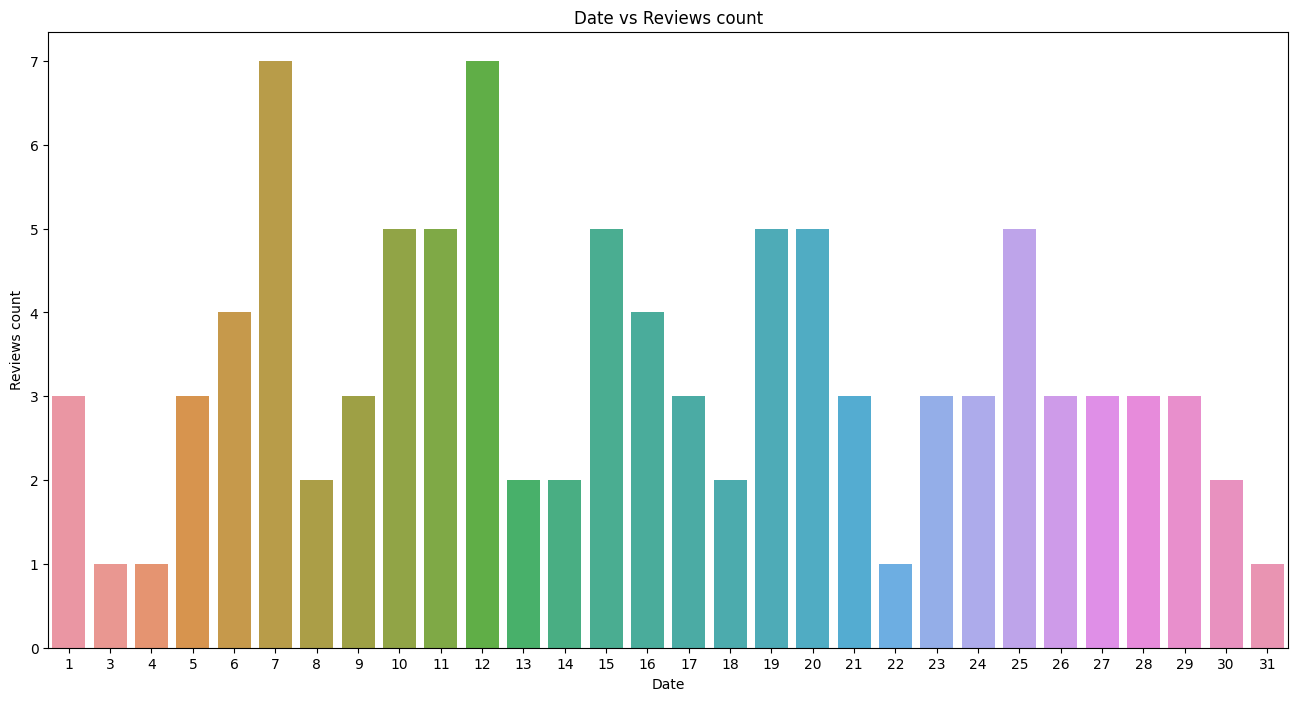

In [30]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

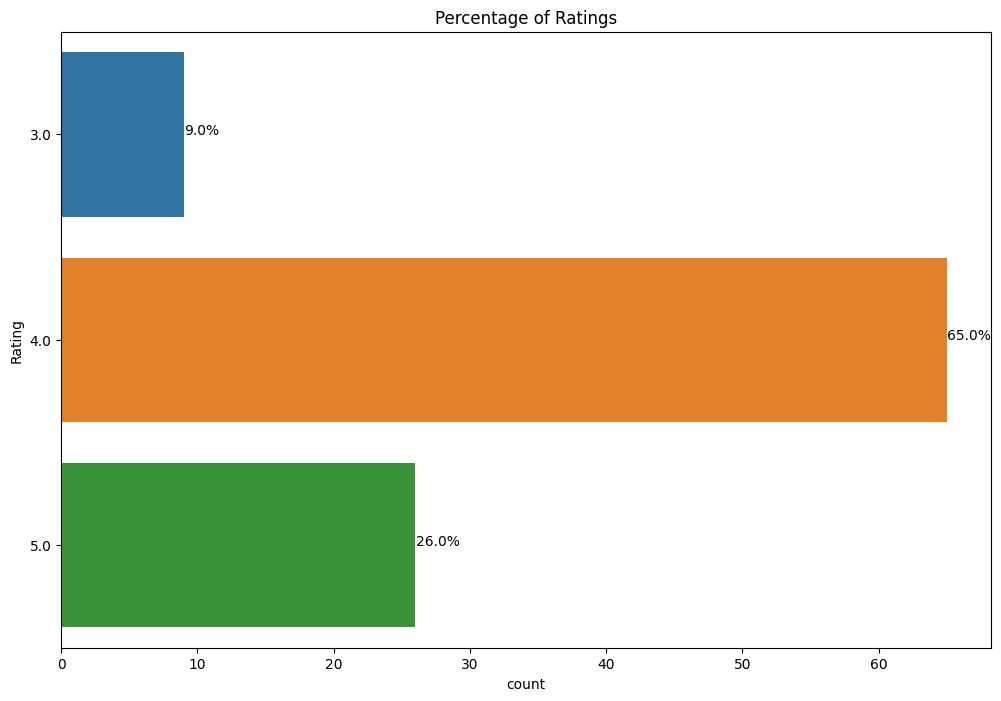

In [31]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

 BasicText Preprocessing

In [35]:
data = df[['Review']]
data

,Review
0,Pros -In one line it is the most balanced smar...
1,The media could not be loaded.\n ...
2,Very good camera(do not trust youtubers)I'd re...
3,Good product
4,"Ok , so this phone is good but not best in seg..."
...,...
95,Same as expected
96,Very good
97,Good product
98,Not good not bad


In [36]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [37]:
data

,Review
0,pros -in one line balanced smartphone budget ....
1,the media could loaded. build quality - rating...
2,very good camera(do trust youtubers)i'd recomm...
3,good product
4,"ok , phone good best segment, encounter minor ..."
...,...
95,same expected
96,very good
97,good product
98,not good bad


In [38]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [39]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,pro one line balanced smartphone budget fast c...,Pros -In one line it is the most balanced smar...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good camera trust youtubers recommend get blac...,Very good camera(do not trust youtubers)I'd re...
3,good product,Good product
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."


Text Pre-processing Techniques

 Pre-processing 'Key Words'

Removing '@names'

In [40]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [41]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro one line balanced smartphone budget fast c...,Pros -In one line it is the most balanced smar...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good camera trust youtubers recommend get blac...,Very good camera(do not trust youtubers)I'd re...
3,good product,Good product
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice oneplus phone camra qulati,Very nice OnePlus phone and camra qulati
6,dislike phone month used auto call recording f...,I dislike this phone after 2 months used. Auto...
7,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."
8,great performance,Great performance
9,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...


Removing links (http | https)

In [42]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro one line balanced smartphone budget fast c...,Pros -In one line it is the most balanced smar...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good camera trust youtubers recommend get blac...,Very good camera(do not trust youtubers)I'd re...
3,good product,Good product
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice oneplus phone camra qulati,Very nice OnePlus phone and camra qulati
6,dislike phone month used auto call recording f...,I dislike this phone after 2 months used. Auto...
7,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."
8,great performance,Great performance
9,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...


Removing Review with empty text

In [43]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro one line balanced smartphone budget fast c...,Pros -In one line it is the most balanced smar...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good camera trust youtubers recommend get blac...,Very good camera(do not trust youtubers)I'd re...
3,good product,Good product
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice oneplus phone camra qulati,Very nice OnePlus phone and camra qulati
6,dislike phone month used auto call recording f...,I dislike this phone after 2 months used. Auto...
7,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."
8,great performance,Great performance
9,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...


Dropping duplicate rows

In [44]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro one line balanced smartphone budget fast c...,Pros -In one line it is the most balanced smar...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good camera trust youtubers recommend get blac...,Very good camera(do not trust youtubers)I'd re...
3,good product,Good product
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice oneplus phone camra qulati,Very nice OnePlus phone and camra qulati
6,dislike phone month used auto call recording f...,I dislike this phone after 2 months used. Auto...
7,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."
8,great performance,Great performance
9,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...


 Resetting index

In [45]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro one line balanced smartphone budget fast c...,Pros -In one line it is the most balanced smar...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good camera trust youtubers recommend get blac...,Very good camera(do not trust youtubers)I'd re...
3,good product,Good product
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice oneplus phone camra qulati,Very nice OnePlus phone and camra qulati
6,dislike phone month used auto call recording f...,I dislike this phone after 2 months used. Auto...
7,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."
8,great performance,Great performance
9,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...


Removing Punctuations, Numbers and Special characters

In [46]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [47]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro one line balanced smartphone budget fast c...,Pros -In one line it is the most balanced smar...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good camera trust youtubers recommend get blac...,Very good camera(do not trust youtubers)I'd re...
3,good product,Good product
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice oneplus phone camra qulati,Very nice OnePlus phone and camra qulati
6,dislike phone month used auto call recording f...,I dislike this phone after 2 months used. Auto...
7,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."
8,great performance,Great performance
9,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...


 Function to remove emoji

In [48]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [49]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro one line balanced smartphone budget fast c...,Pros -In one line it is the most balanced smar...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good camera trust youtubers recommend get blac...,Very good camera(do not trust youtubers)I'd re...
3,good product,Good product
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice oneplus phone camra qulati,Very nice OnePlus phone and camra qulati
6,dislike phone month used auto call recording f...,I dislike this phone after 2 months used. Auto...
7,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."
8,great performance,Great performance
9,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...


In [50]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,pro one line balanced smartphone budget fast c...,Pros -In one line it is the most balanced smar...,"[pro, one, line, balanced, smartphone, budget,..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,"[medium, could, loaded, build, quality, rating..."
2,good camera trust youtubers recommend get blac...,Very good camera(do not trust youtubers)I'd re...,"[good, camera, trust, youtubers, recommend, ge..."
3,good product,Good product,"[good, product]"
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg...","[ok, phone, good, best, segment, encounter, mi..."
5,nice oneplus phone camra qulati,Very nice OnePlus phone and camra qulati,"[nice, oneplus, phone, camra, qulati]"
6,dislike phone month used auto call recording f...,I dislike this phone after 2 months used. Auto...,"[dislike, phone, month, used, auto, call, reco..."
7,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ...","[basic, usage, okay, using, know, much, plasti..."
8,great performance,Great performance,"[great, performance]"
9,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...,"[best, g, phone, price, point, working, soothe..."


In [51]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

 Removing Stop words

In [52]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [53]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [54]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,pro one line balanced smartphone budget fast c...,Pros -In one line it is the most balanced smar...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,good camera trust youtubers recommend get blac...,Very good camera(do not trust youtubers)I'd re...
3,good product,Good product
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice oneplus phone camra qulati,Very nice OnePlus phone and camra qulati
6,dislike phone month used auto call recording f...,I dislike this phone after 2 months used. Auto...
7,basic usage okay using know much plastic back ...,"for basic usage Okay, I am not using it, so I ..."
8,great performance,Great performance
9,best g phone price point working soothe camera...,Best 5G phone at this price point and working ...


Tokenize 'Clean_Reviews'

In [55]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'build', 'quality', 'rating', 'one', 'light', 'weight', 'phone', 'say', 'quite', 'comfortable', 'one', 'hand', 'usage', 'even', 'material', 'used', 'polycarbonate', 'get', 'job', 'done', 'matter', 'back', 'cover', 'term', 'styling', 'similar', 'oppo', 'phone', 'liked', 'recommend', 'gray', 'one', 'attache', 'fingerprint', 'going', 'use', 'back', 'cover', 'matterdisplay', 'rating', 'really', 'good', 'amoled', 'plan', 'hz', 'refresh', 'rate', 'work', 'well', 'wish', 'could', 'hz', 'bottom', 'chin', 'quite', 'thick', 'thing', 'yes', 'gorilla', 'glass', 'protection', 'screen', 'guard', 'pre', 'applied', 'panel', 'one', 'best', 'pretty', 'decent', 'wellperformance', 'rating', 'dimensity', 'ufs', 'lppdr', 'x', 'ram', 'get', 'job', 'done', 'regular', 'day', 'day', 'operation', 'played', 'game', 'say', 'considering', 'soc', 'pretty', 'good', 'expect', 'fps', 'stable', 'bgmi', 'cod', 'still', 'would', 'say', 'processor', 'good', 'competition', 'offering', 

In [56]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [pro, one, line, balanced, smartphone, budget,...
1    [medium, could, loaded, build, quality, rating...
2    [good, camera, trust, youtubers, recommend, ge...
3                                      [good, product]
4    [ok, phone, good, best, segment, encounter, mi...
5                [nice, oneplus, phone, camra, qulati]
6    [dislike, phone, month, used, auto, call, reco...
7    [basic, usage, okay, using, know, much, plasti...
8                                 [great, performance]
9    [best, g, phone, price, point, working, soothe...
Name: Clean_Reviews, dtype: object

 Converting words to Stemmer

In [57]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [58]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,pro one line balanc smartphon budget fast char...
1,medium could load build qualiti rate one light...
2,good camera trust youtub recommend get black l...
3,good product
4,ok phone good best segment encount minor bug l...
...,...
93,expect
94,good
95,good product
96,good bad


Converting words to Lemma

In [59]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,stemmed
0,pro one line balanced smartphone budget fast c...
1,medium could loaded build quality rating one l...
2,good camera trust youtubers recommend get blac...
3,good product
4,ok phone good best segment encounter minor bug...
...,...
93,expected
94,good
95,good product
96,good bad


 Basic Feature Extaction

Applying bag of Words without N grams

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [63]:
print(tweetscv.toarray()[100:200])

[]


 CountVectorizer with N-grams (Bigrams & Trigrams)

In [64]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/98 [00:00<?, ?it/s]

In [65]:
corpus[3]

'good product'

In [66]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
X.shape

(98, 3044)

 TF-IDF Vectorizer

In [69]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/98 [00:00<?, ?it/s]

In [70]:
corpus[4]

'ok phone good best segment encount minor bug like app crash idk happen perform quit good lag frame drop game like bgmi camera camera quit good make photo colour oversatur ultra wide len selfi camera good final review go get k keep mind display good get p yt heat issu batteri perform also good budget tight look brand valu go edit app crash problem fix updat'

In [71]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()
X.shape

(98, 3044)

In [73]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

Named Entity Recognition (NER)

In [75]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'pro one line balanced smartphone budget fast charging battery backup hz display okayish camera never disappoints con want high performance device phone better processor want overall phone task throw phone go medium could loaded build quality rating one light weight phone say quite comfortable one hand usage even material used polycarbonate get job done matter back cover term styling similar oppo phone liked recommend gray one attache fingerprint going use back cover matterdisplay rating really good amoled plan hz refresh rate work well wish could hz bottom chin quite thick thing yes gorilla glass protection screen guard pre applied panel one best pretty decent wellperformance rating dimensity ufs lppdr x ram get job done regular day day operation played game say considering soc pretty good expect fps stable bgmi cod still would say processor good competition offering better decide gaming matter next year last easily normal usagesoftware biggest con android based oxygen say future colo

In [76]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [77]:
for token in doc_block[:50]:
    print(token,token.pos_)

pro ADJ
one NUM
line NOUN
balanced VERB
smartphone NOUN
budget NOUN
fast ADV
charging VERB
battery NOUN
backup NOUN
hz PROPN
display NOUN
okayish ADJ
camera NOUN
never ADV
disappoints NOUN
con PROPN
want VERB
high ADJ
performance NOUN
device NOUN
phone NOUN
better ADJ
processor NOUN
want VERB
overall ADJ
phone NOUN
task NOUN
throw VERB
phone NOUN
go NOUN
medium NOUN
could AUX
loaded VERB
build VERB
quality NOUN
rating NOUN
one NUM
light ADJ
weight NOUN
phone NOUN
say VERB
quite ADV
comfortable ADJ
one NUM
hand NOUN
usage NOUN
even ADV
material NOUN
used VERB


In [78]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['mp', 'atleast', 'expecting', 'sensor', 'provided', 'omnivison', 'sensor', 'get', 'job', 'done', 'camera', 'check', 'review', 'video', 'p', 'mp', 'ultratwide', 'camera', 'saying', 'others', 'offering', 'oneplus', 'managed', 'give', 'thingsbattery', 'rating', 'rate', 'percent', 'brightness', 'mode', 'excluding', 'gaming', 'give', 'hr', 'wifi', 'rest', 'remaining', 'wifi', 'battery', 'task', 'day', 'charging', 'take', 'minute', 'charge', 'percent', 'fastspeakers', 'speaker', 'quality', 'quality', 'rating', 'none', 'party', 'complained', 'voice', 'getting', 'conclude', 'buy', 'care', 'oneplus', 'want', 'try', 'oneplus', 'time', 'getting', 'price', 'rejected', 'miui', 'user', 'want', 'software', 'ad', 'notification', 'bloatwares', 'camera', 'trust', 'youtubers', 'recommend', 'get', 'look', 'product', 'phone', 'segment', 'encounter', 'bug', 'app', 'crash', 'idk', 'happening', 'performance', 'lag', 'frame', 'drop', 'game', 'camera', 'camera', 'make', 'photo', 'colour', 'oversaturated']


In [79]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,56
1,camera,31
2,quality,21
3,battery,18
4,price,15
5,oneplus,11
6,day,10
7,performance,9
8,use,9
9,buy,9


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

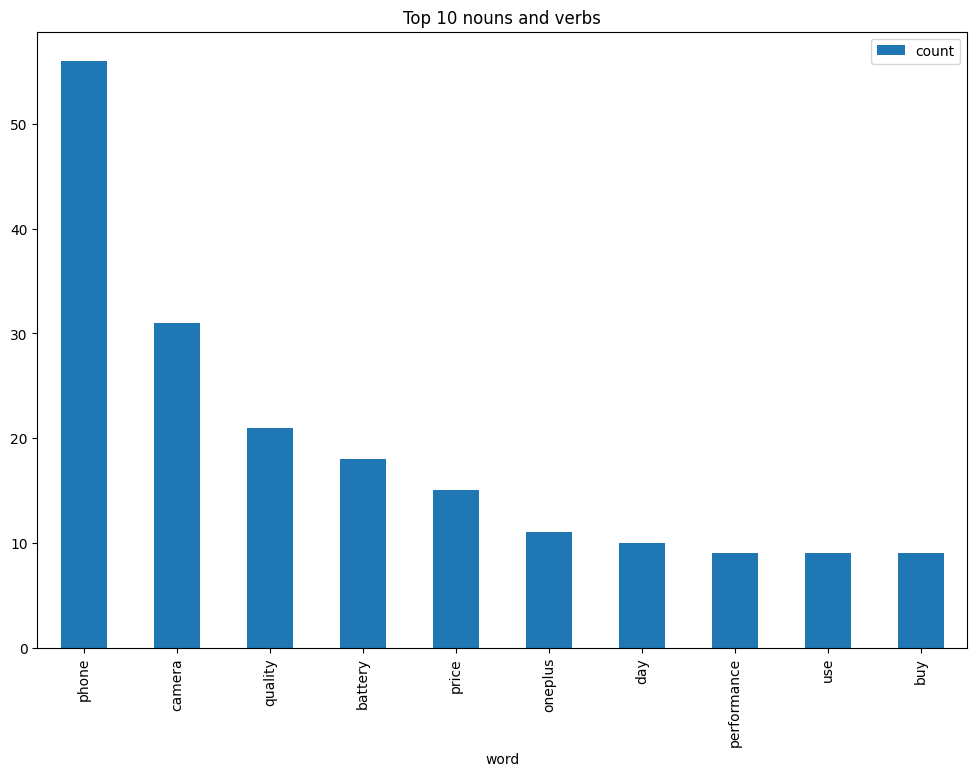

In [80]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

Feature Extraction

 Feature Extraction for 'Key Words'

In [81]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

Fetch sentiments

In [82]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

Using NLTK's SentimentIntensityAnalyzer

In [83]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,95
neg,3


In [84]:
dataframe.Clean_Reviews[8]

'great performance'

In [85]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

Using TextBlob

In [96]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,96
neg,2


In [97]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,pro one line balanced smartphone budget fast c...,Pros -In one line it is the most balanced smar...,0.410000,0.215000
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,0.512212,0.213783
2,good camera trust youtubers recommend get blac...,Very good camera(do not trust youtubers)I'd re...,0.636111,0.344444
3,good product,Good product,0.600000,0.700000
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg...",0.491837,0.362245


Text(0, 0.5, 'Subjectivity')

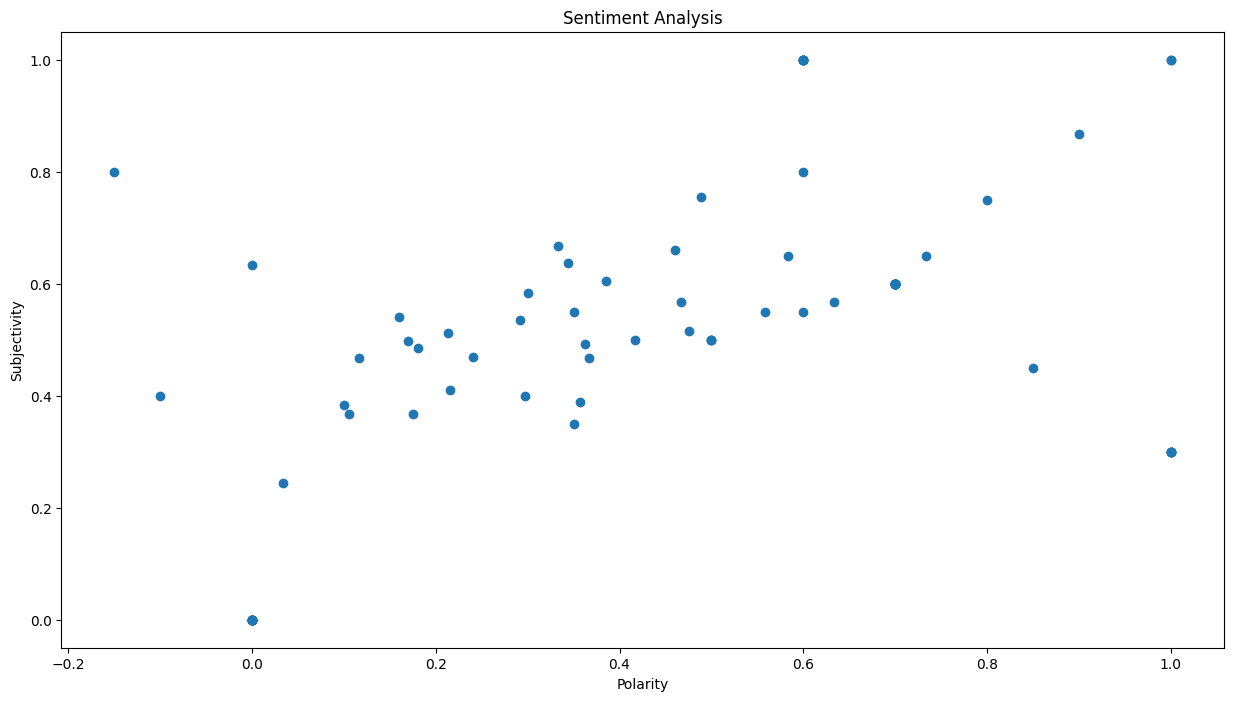

In [98]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')